# ML Kaggle Challenge 2

**Introduction**

We first jumpstarted our Kaggle challenge implementing the Multivariate Regression to try and see how it goes and after getting success on implementing Multivariate Regression, we thought of moving towards implementing the NMF model. 

We still tried understanding the NMF algorithm and for few days tried implementing it but it was quite challenging so we again decided on going with the Multivariate Regression first and then to work on NMF.


**Import Dataset**

I first imported the dataset and also stored it as an array with the below code using numpy.ndarray.

In [1]:
import numpy as np

#importing data set and store as numpy.ndarray array
A = np.genfromtxt('training_set_rna1.csv', delimiter=',', dtype=None, encoding=None)
y = np.genfromtxt('training_set_adt1.csv', delimiter=',', dtype=None, encoding=None)
A_test = np.genfromtxt('test_set_rna1.csv', delimiter=',', dtype=None, encoding=None)


In [2]:
# Doing matrix multiplication for solving ax=b
a = np.dot(A,A.T)
b = np.dot(A,y.T)

In [3]:
a.shape

(639, 639)

In [4]:
b.shape

(639, 25)

**Applying Multivariate Regression**

Multivariate Regression is used when we want to predict the matrix based on the value of two different matrix. Here, our Multivariate Regression technique refers to Ax=y, we have A as training_set_rna1 and y as training_set_adt1. We would need to solve x with the value of A and y and for solving x, we use Gradient Descent.

**Gradient Descent**

Gradient Descent is the optimization algorithm that minimizes the loss function of a model. Through gradient descent, it finds the value of the model parameters which provides smallest possible value of the loss function.

Our gd_solve function takes the parameter a, b, max_iter(maximum iteration), tol_cutoff(tolerance cutoff). The maximum iteration and tolerance cutoff will lead to algorithm to stop once the model reaches the maximum iteration and tolerance cutoff point.

The gd_solve function first sets the x matrix as an array of zero which has the same dimension as that of the b matrix. Our function then performs the iterative process of solving a and b where it first computes the residual z which is calculated by dividing the ith element of b with the diagonal element of a.

In [5]:
#Function solving gradient descent algorithm

def gd_solve(a, b, max_iter=10000, tol_cutoff=1e-15):
    x = np.zeros_like(b)
    for iter in range(1, max_iter+1):
        tol = np.zeros_like(b)
        for i in range(len(b)):
            z = b[i] / a[i, i]
            x[i] += z
            b -= z * a[:, i].reshape((len(b), 1))
            tol += np.abs(z / x[i])
        if np.all(tol < tol_cutoff):
            print('Break')
            break
    return x

In [6]:
#call the gd_solve function
x = gd_solve(a,b)

In [7]:
x.shape

(639, 25)

We first tried on implementing the Multivariate Regression and see how our model did for predicting the test_adt. We got a score of **0.80178** from our first Kaggle submission through which we knew that we were on a right track. We also started working on understanding and writing NMF function referring to the pseudocode. We simultaneously worked on improving our Multivariate Regression model too. We worked on changing the maximum iteration which improved the score to **0.80217**


After trying various methods, adding **Learning Rate** to our model helped in significantly increasing our score. **Learning Rate** is a tuning parameter in an optimization algorithm which determined the step size for each iteration while moving towards a minimum of a loss function.

In [8]:
#using gd_solve for solving the value of x adding learning rate
def gd_solve(a, b, learning_rate = 0.01, max_iter=18000, tol_cutoff=1e-9):
    x = np.zeros_like(b)
    for iter in range(1, max_iter+1):
        tol = np.zeros_like(b)
        for i in range(len(b)):
            #print(b[i])
            z = b[i] / a[i, i]
            x[i] += learning_rate * z
            b -= learning_rate * z * a[:, i].reshape((len(b), 1))
            tol += np.abs(z / x[i])
        if np.all(tol < tol_cutoff):
            print('Break')
            break
    return x

In [9]:
#call the function above with learning = 0.0001
x = gd_solve(a, b, learning_rate = 0.0001)

In [10]:
x.shape

(639, 25)

Implementing learning rate to our model showed a improvement in the score to **0.80235**. We also tried implementing other method such as Guassian Elimination, regularization, and momentum. However, all of these method didn't provide any improvement in  our model.

In [11]:
#function gd_solve using learning rate and regularization
def gd_solve_reg(a, b, learning_rate=0.01, max_iter=18000, tol_cutoff=1e-15, alpha=0):
    x = np.zeros_like(b)
    for iter in range(1, max_iter+1):
        tol = np.zeros_like(b)
        for i in range(len(b)):
            z = b[i] / a[i, i]
            if alpha != 0:
                x[i] *= (1 - learning_rate * alpha)
            x[i] += learning_rate * z
            b -= learning_rate * z * a[:, i].reshape((len(b), 1))
            tol += np.abs(z / x[i])
        if np.all(tol < tol_cutoff):
            break
    return x

x =gd_solve_reg(a,b,alpha=0.01)

Applying regularization didn't provided any improvement in our model, so we focused more on changing the learning rate, maximum iteration and tolerance cutoff. We tried many learning rate and maximum iteration. Through running multiple times, we concluded that our optimal learning rate was at **0.0001** which improved our score to **0.81240**. Further, we changed and improved the maximum iteration and found our optimal maximum iteration at **18000** which improved our score to **0.81440**.

In [12]:
x.shape

(639, 25)

In [13]:
#Transposing the matrix and performing matrix multiplication
yt= np.dot(x.T,A_test)

In [14]:
yt.shape

(25, 1000)

In [15]:
# save the array to a CSV file
np.savetxt('test18000.csv', yt, delimiter=',')

After downloading our csv file, we then worked on Professors code in R studio to change our csv file into Kaggle submission format following the below code in R

Convert to Kaggle submission format by reshaping from wide to tall:
```{r}
test <- as.matrix(read.csv("submission.csv", row.names = 1))
```



```{R}
sample_submission <- reshape2::melt(test)
head(sample_submission)
```

```{R}
sample_submission <- data.frame(
  "ID" = paste0("ID_", 1:nrow(sample_submission)), 
  "Expected" = sample_submission$value)
head(sample_submission)
```

Write the final submission file.

```{R}
write.csv(sample_submission, "my_submission.csv", row.names = FALSE)
```

**Implementing NMF Algorithm - Other Approach**

We finalized with going with the Multivariate Regression, however, we also tried NMF approach. Non-Negative Matrix Factorization is one of the dimension reduction technique that is used to factorize non-negative matrix A into two non-negative matrix W and H. Firstly, we executed our gradient descent algorithm, the gradient descent algorithm for NMF is quite different than that of the Multivariate Regression as in NMF we include only non-negativity.

**Gradient Descent for NMF**

The function first sets x as a vector of zeros and the loop is performed which updates x to minimize the residual error between a and b. Also, if the maximum iteration is achieved before convergence then the algorithm exits and it then provides us the estimate of x.


In [16]:
#Function that performs gradient descent

def gd_solve(a, b, max_iter=100, tol_cutoff=1e-8):
    x = np.zeros(len(b))
    for iter in range(1, max_iter+1):
        tol = 0
        for i in range(len(b)):
            if a[i, i] == 0:
                z = 0
            else:
                z = b[i] / a[i, i]
            
            if x[i] + z < 0:
                z = -x[i]
                x[i]=0
            else:    
                x[i] = x[i] + z
            
            b = b - z * a[:, i]
            tol = tol + abs(z / (x[i] + 1e-15))
        if tol < tol_cutoff:
            break
    return x



In [17]:
#Function that performs NMF

def nmf(A, k, max_iter=100):
    # Initialize W and H
    m, n = A.shape
    W = abs(np.random.rand(m, k))
    H = np.zeros((k, n))
    at = A.T

    
    # Iteratively update W and H
    for i in range(max_iter):
        # Update H
        a = np.dot(W.T, W)
        #print('a',a.shape)
        for j in range(n):
            
            b = np.dot(W.T, A[:, j])
            x= gd_solve(a,b)
            H[:,j] = x
      
        # Normalize H
        
        #print(np.sum(H, axis=0))
        #print('H',H.shape)
        
        #print('a',a.shape)
        
        # Update W
        aw = np.dot(H,H.T)
        #print('aw',aw.shape)
        for i in range(0,m):
            #print('i',i)
            bw = np.dot(H, at[:,i])
            #print('bw',bw.shape)
            x1= gd_solve(aw,bw)
            W.T[:, i] = x1

 
    return W, H



The above NMF function first randomly intializes W and H. Through NMF, we are looking to find the best factorization that minimizes the error between A and WH. We first update H from the given A and W (which is randomly intialized). Once we have the H, we then update W. The NMF function uses the gradient descent (gd_solve function) to update H and W.

In [18]:
#specifying number of k
k = 15
w1,h1 = nmf(A, k)

In the above code, the variable k specifies the value of k in the NMF which specifies the number of column in W and rows in W.

In [19]:
w1.shape

(639, 15)

In [20]:
h1.shape

(15, 4000)

In [21]:
#calculating A1 which is predicted with NMF
A1=np.dot(w1,h1)

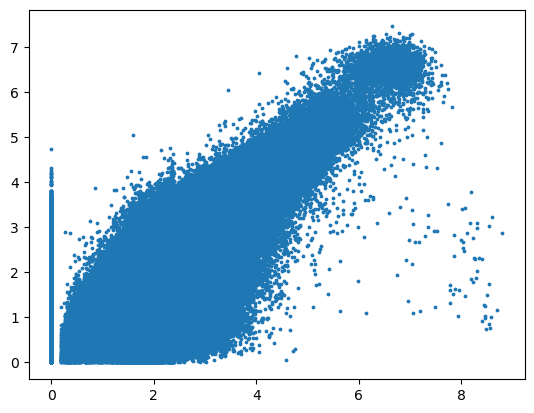

In [22]:
import matplotlib.pyplot as plt
plt.scatter(A, A1,s=3)
plt.show()

We tried implementing various value of k starting with 2,3 9, and 15. Among all, k as 15 provided more accuracy of the model. We also tried scaling, it showed some error, so we mainly focused on implementing the NMF model first and tried to see if our function provided any error or not. We also calculated mean square error to find out the error between the observed and predicted value. While setting k as 15, our mean square error decreased to 0.69 from 3.

**Conclusion**

The Multivariate Regression provided good score than I expected, I enjoyed implementing the class knowledge practically to predict. Furthermore, I also hoped to finish the NMF model,however, due to limited time we couldn't complete it. I look forward to continuing this project to implement the NMF model and see how both the NMF model and Multivariate Regression performs to compare the score. 

**Reference**

1. https://www.kaggle.com/code/zdebruine/getting-started-with-ml-challenge-2-prediction
2. https://www.csie.ntu.edu.tw/~cjlin/papers/pgradnmf.pdf
